In [2]:
import numpy as np
import matplotlib.pyplot as pl
import seaborn as sns
import itertools as it
from pathlib import Path
import re
import pandas as pd
from tqdm import tqdm

sns.set_style('darkgrid')

In [3]:
df = pd.read_csv('../data/concentration_samples.csv')
for key in ['N', 'd', 'C', 'mode']:
    unique_vals = df[key].unique()
    print(f'Unique vals for {key}: {unique_vals}')
df.replace([np.inf, -np.inf], np.nan, inplace=True)

Unique vals for N: [  2   4   8  16  32  64 128 256]
Unique vals for d: [ 2  4  8 16 32]
Unique vals for C: [ 10 100]
Unique vals for mode: ['lin_lin' 'lin_sq' 'sq_lin']


In [4]:
df2 = df.copy()
df2['lmin_B_isna'] = df.lmin_B.isna()
df2['lmax_G_isna'] = df.lmax_G.isna()
df2 = df2.groupby(['N', 'd', 'C', 'mode'])[['lmin_B_isna', 'lmax_G_isna']].sum() / df2.groupby(['N', 'd', 'C', 'mode'])[['lmin_B_isna', 'lmax_G_isna']].count()
print(df2.loc[(df2.lmin_B_isna > 0) | (df2.lmax_G_isna > 0)])

df.dropna(inplace=True)
df['quotient'] = df['lmin_B'] - df['lmax_G']

                    lmin_B_isna  lmax_G_isna
N   d  C   mode                             
64  16 10  lin_lin     0.000093          0.0
    32 10  lin_lin     0.000185          0.0
128 2  10  lin_lin     0.000185          0.0
           lin_sq      0.000278          0.0
       100 lin_lin     0.000093          0.0
    4  10  lin_lin     0.001019          0.0
           lin_sq      0.000741          0.0
       100 lin_lin     0.000278          0.0
    8  10  lin_lin     0.003148          0.0
           lin_sq      0.001574          0.0
       100 lin_lin     0.001574          0.0
    16 10  lin_lin     0.009074          0.0
           lin_sq      0.002685          0.0
       100 lin_lin     0.002407          0.0
    32 10  lin_lin     0.017870          0.0
           lin_sq      0.001944          0.0
       100 lin_lin     0.006296          0.0
256 2  10  lin_lin     0.004907          0.0
           lin_sq      0.002593          0.0
    4  10  lin_lin     0.016111          0.0
          

Basically, all the $N = 256$, $d > 2 examples are unreliable for quantile approximation

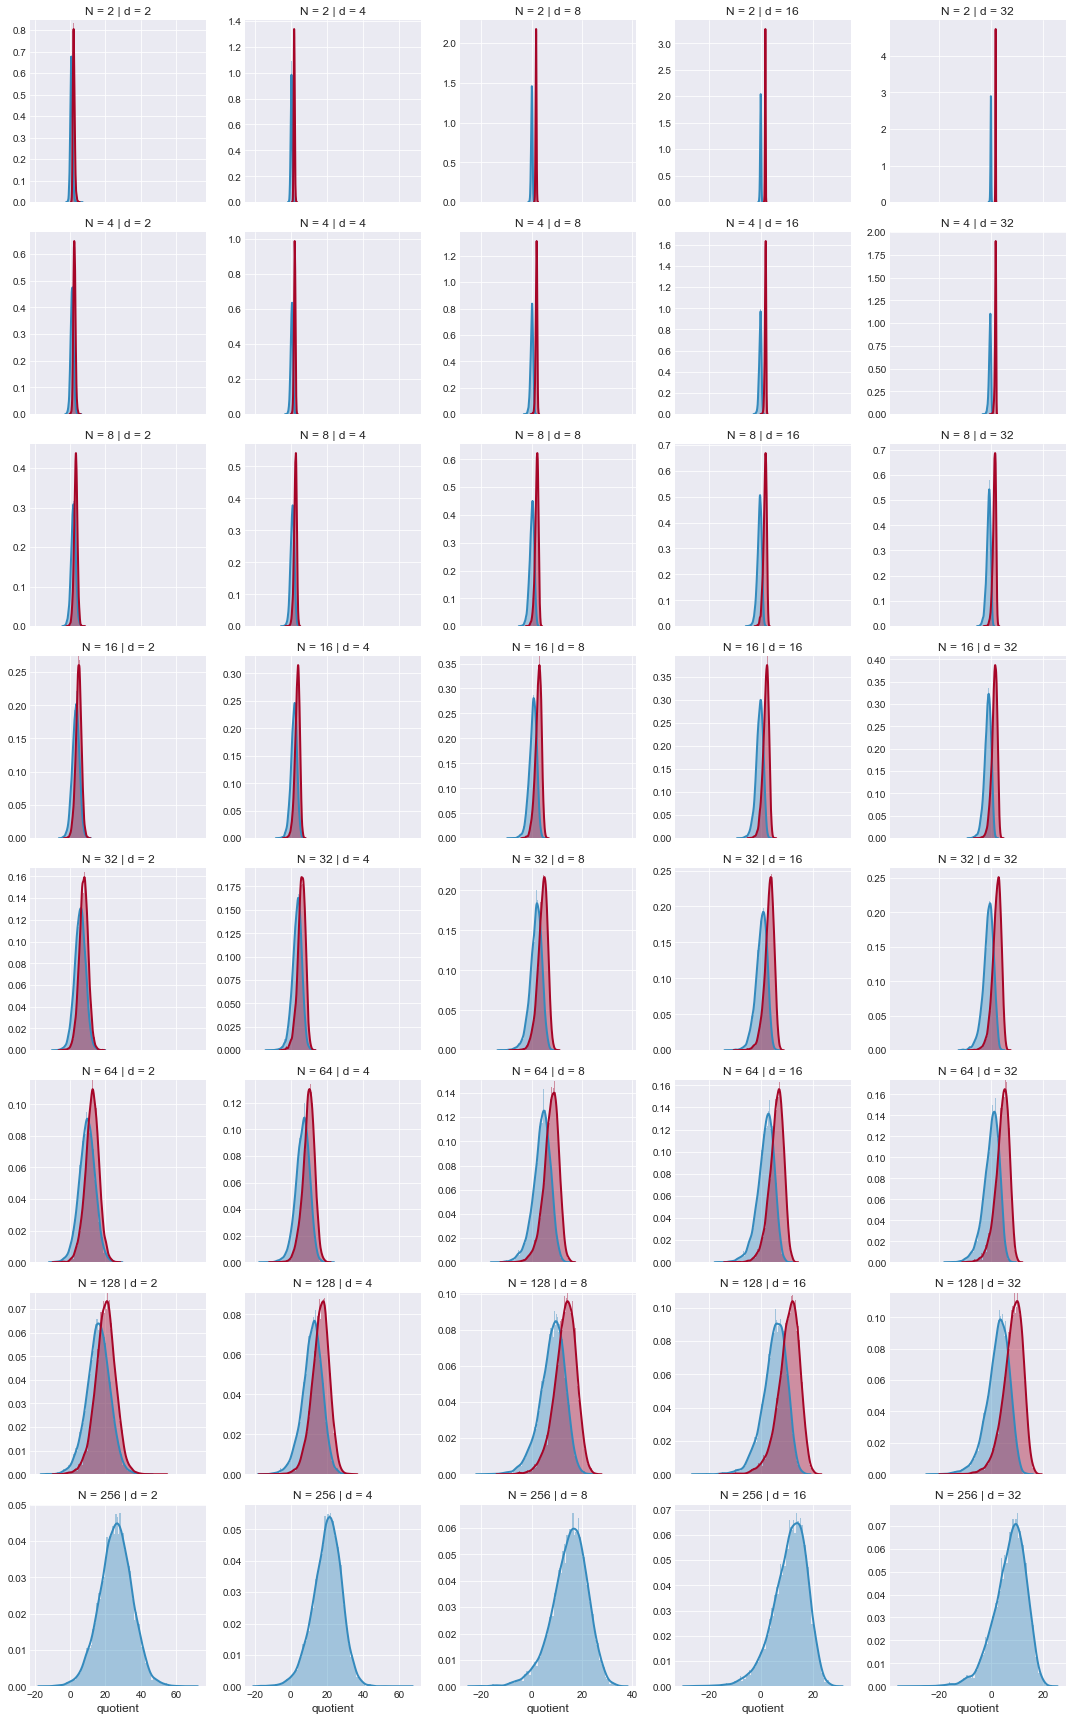

In [5]:
df_sel = df.loc[df['mode'] == 'lin_lin']
grid = sns.FacetGrid(df_sel, col='d', row='N', hue='C', sharex='col', sharey=False)
grid.map(sns.distplot, 'quotient', bins=100)

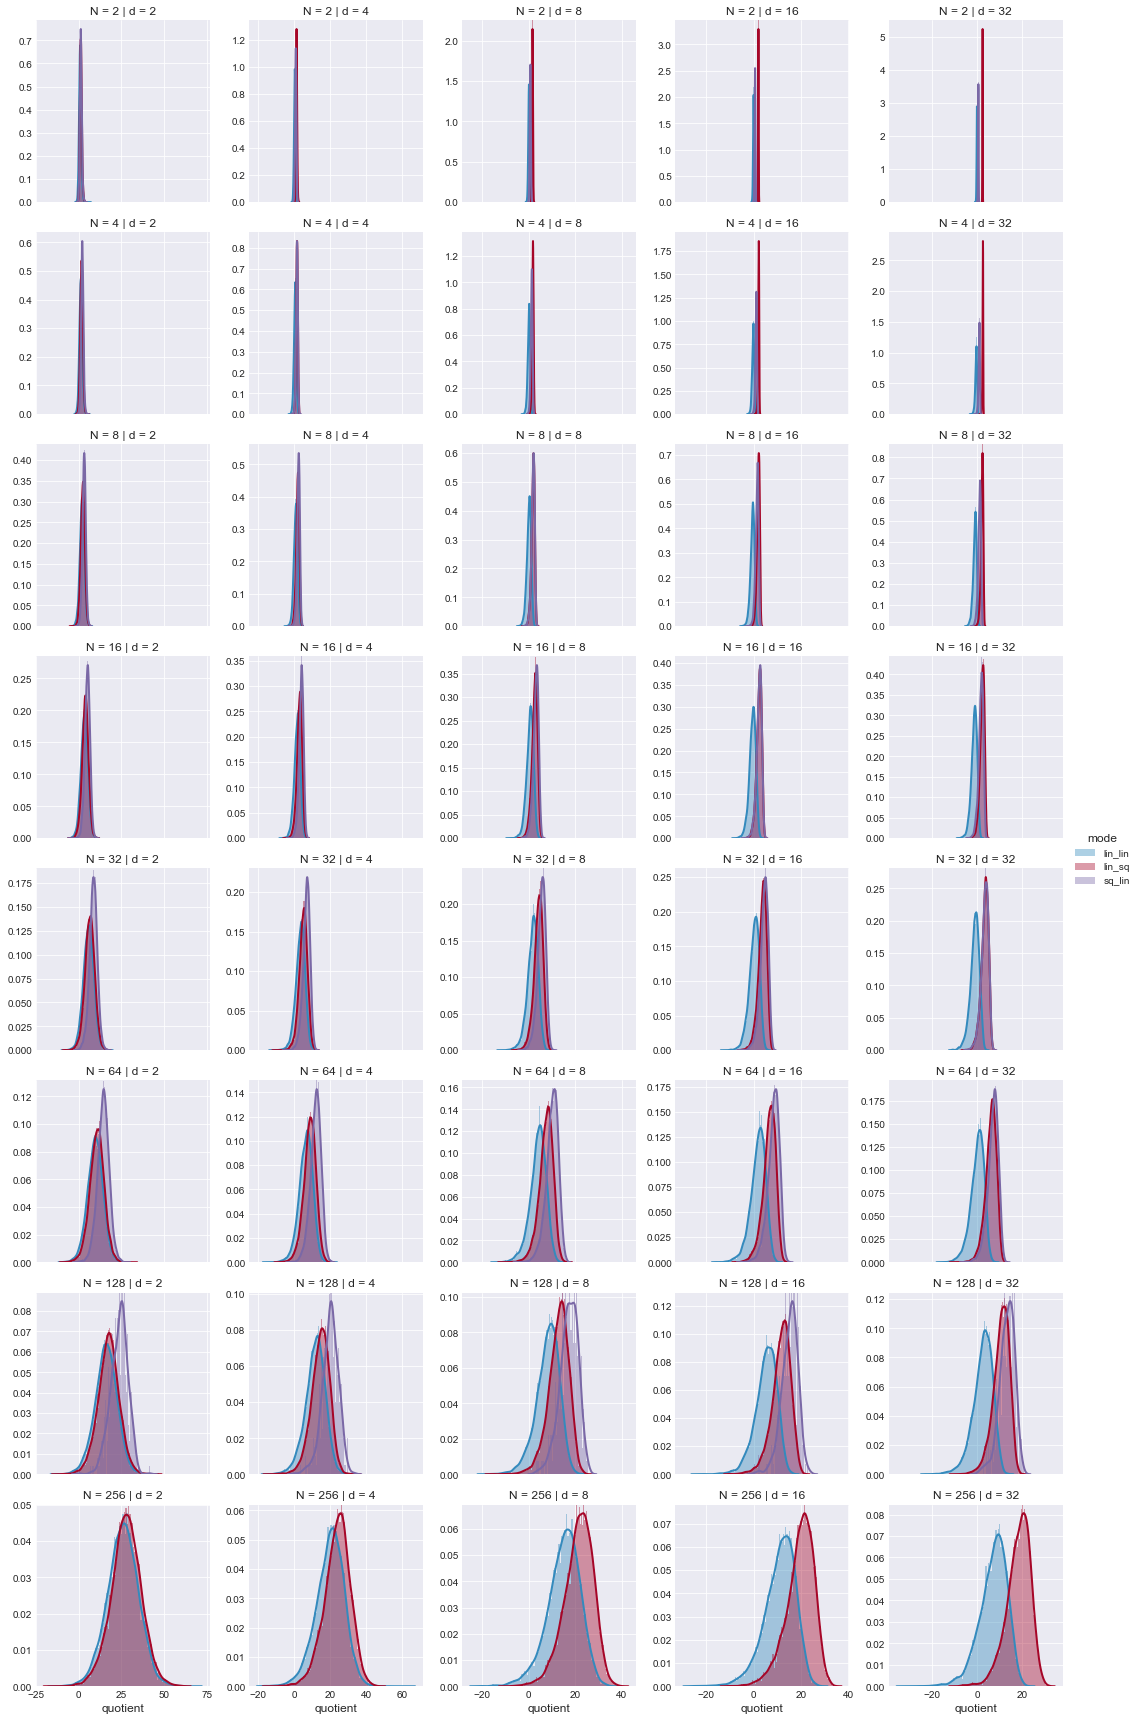

In [6]:
df_sel = df.loc[df['C'] == 10]
grid = sns.FacetGrid(df_sel, col='d', row='N', hue='mode', sharex='col', sharey=False)
grid.map(sns.distplot, 'quotient', bins=100).add_legend()